Examining (non-rescalded) simulation for equilibration time, what is measured, what is averages

In [291]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import numpy as np
import math

In [499]:
path = "/home/jsk/cylinder/2021-04-06_102434" #a directory of un-rescaled alpha vs k simulations
path2 = "/home/jsk/cylinder/2021-04-06_104416" # a version with n=1
path3 = "/home/jsk/cylinder/2021-04-06_155300" #a version with high ST gamma=10

Simulations were run at a viabl c=.01, T=.01, 15 000 recorded steps 

In [469]:
infile = os.path.join(path, "infile.txt")
with open(infile) as F:
    inf=F.read()
print(inf)

--n_steps 15000
--field_type lattice
--method  sequential
--alpha -1
--C .01
--u 1
--n 6
--kappa 0
--gamma 2
--temp .01
--intrinsic_curvature  0
--amplitude 0  
--radius 1
--wavenumber  1
--num_field_coeffs 2 3
--measure_every 50
--fieldsteps_per_ampstep  100  
--dims 50 50



In [498]:
infile = os.path.join(path2, "infile.txt")
with open(infile) as F:
    inf=F.read()
print(inf)

--n_steps 15000
--field_type lattice
--method  sequential
--alpha -1
--C .01
--u 1
--n 1
--kappa 0
--gamma 2
--temp .01
--intrinsic_curvature  0
--amplitude 0  
--radius 1
--wavenumber  1
--num_field_coeffs 2 3
--measure_every 50
--fieldsteps_per_ampstep  100  
--dims 50 50



In [514]:
infile = os.path.join(path3, "infile.txt")
with open(infile) as F:
    inf=F.read()
print(inf)

--n_steps 15000
--field_type lattice
--method  sequential
--alpha -1
--C .01
--u 1
--n 6
--kappa 0
--gamma 10
--temp .01
--intrinsic_curvature  0
--amplitude 0  
--radius 1
--wavenumber  1
--num_field_coeffs 2 3
--measure_every 50
--fieldsteps_per_ampstep  100  
--dims 50 50



After the first few tries I took out k=0.005 and k=.105, starting at k=.2.
I raised temperature to .01 and started random initialize with complex numbers closer to 0.  But the real problem with simulations being 'stuck' is in choice of c: since cell area is ~.01, c should be of order alpha0*.01.  c=c'=1 will be too big relative to alpha'.

In [221]:
def sort_csv(filename, dtype=float, fct=(lambda x: abs(x))):
    if dtype==complex:
        dtype = str
        data=pd.read_csv(filename, index_col=0)
        data.columns = data.columns.astype("float")
        data.index = data.index.astype("float")
        data=data.applymap(complex)
        data=data.applymap(lambda x: fct(x))
    else:
        data=pd.read_csv(filename, index_col=0, dtype=dtype)
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    return data

Equilibration: will examine later what the problem areas are, but looks accptable

<AxesSubplot:>

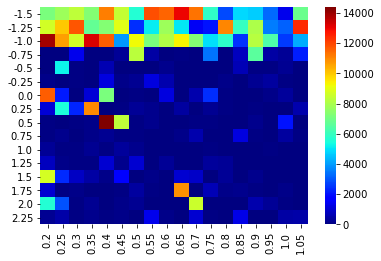

In [515]:
global_cutoff= sort_csv(path+"/global_cutoff.csv")
sb.heatmap(global_cutoff, cmap='jet')

<AxesSubplot:>

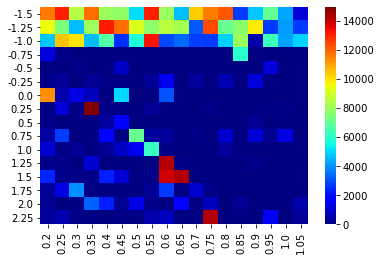

In [516]:
global_cutoff= sort_csv(path2+"/global_cutoff.csv")
sb.heatmap(global_cutoff, cmap='jet')

<AxesSubplot:>

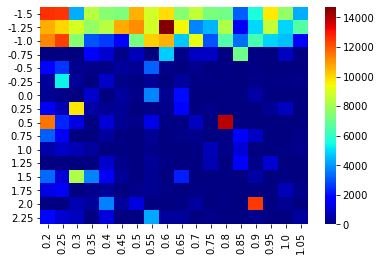

In [517]:
global_cutoff= sort_csv(path3+"/global_cutoff.csv")
sb.heatmap(global_cutoff, cmap='jet')

### Result:
the equilibrium shape amplitude a, as a function of alpha_0 and k. 
(naive version / 0th order in terms of rescaling)

<AxesSubplot:>

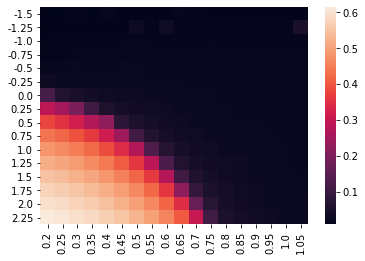

In [521]:
abs_amplitude2= sort_csv(path+"/abs_amplitude.csv")
sb.heatmap(abs_amplitude2)

<AxesSubplot:>

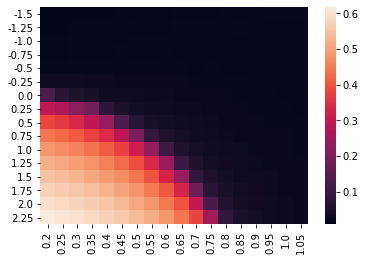

In [497]:
abs_amplitude= sort_csv(path2+"/abs_amplitude.csv")
sb.heatmap(abs_amplitude)

<AxesSubplot:>

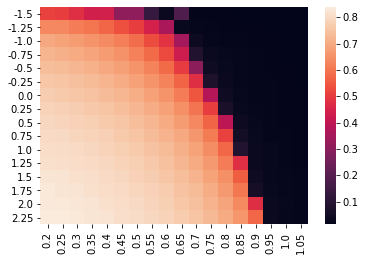

In [520]:
abs_amplitude3= sort_csv(path3+"/abs_amplitude.csv")
sb.heatmap(abs_amplitude3)

Description: we see a stabilizing influence of ordered fields, while for disordered high-"temperature" (in material parameter alpha) fields we increasinly approach the field-free behavior for higher positive alpha, which will result in field closer to 0 everywhere and fluctuating less.  At this c, n there are no unstable cylinders with ordered field.  
The reversal of effective surface tension is not seen, would be seen at more negative alpha (not compensated with raising gamma).

TODO: Check where lower bound line is on this graph

TODO: too see oredered fields on curved cylinders, we would need lower c or n.  This shouldn't be a problem for equilibration.

Outcome:  fluctuations are important.  0K theory says there is no differnce between any alpha >= 0 fields (and no field), but the simulation says differently.  Fluctuations in the isotropic phase can stabilize surface.

 the predicted line:
k_c = sqrt(1+(c n^2 alpha)/(.5 gamma u - alpha^2) )

In [323]:
def upper_limit(alpha, c, n, gamma, u=1):
    if alpha  >=0: 
        return 1
    else:
        try:
            kc = math.sqrt(1+(alpha*c*n**2)/(.5*gamma*u-alpha**2))
            #print(alpha,(.5*gamma*u-alpha**2))
        except ValueError:
            kc=np.nan
        return kc

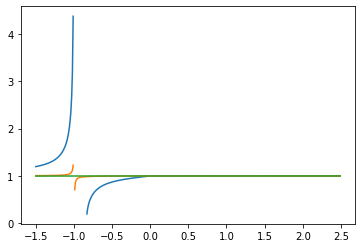

In [525]:
alphas=np.arange(-1.5, 2.5,.01 )
line = [upper_limit(alpha=alpha, c=.01, n=6, gamma=2) for alpha in alphas]
plt.plot(alphas, line)
line2 = [upper_limit(alpha=alpha, c=.01, n=1, gamma=2) for alpha in alphas]
plt.plot(alphas, line2)
line3 = [upper_limit(alpha=alpha, c=.01, n=1, gamma=10) for alpha in alphas]
plt.plot(alphas, line3)

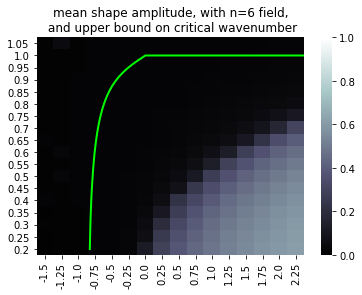

In [458]:

sb.heatmap(abs_amplitude.T[::-1], cmap='bone', vmin=0, vmax=1)
plt.plot( [(1.5+a)/.25+.5 for a in alphas],[(-k+1.05)/.05+.5 for k in line], c='lime', linewidth=2)

#plt.plot([(k-.2)/.05 for k in line2], [(1.5+a)/.25 for a in alphas])
plt.xlabel="alpha"
plt.title("mean shape amplitude, with n=6 field,\n and upper bound on critical wavenumber")
plt.show()

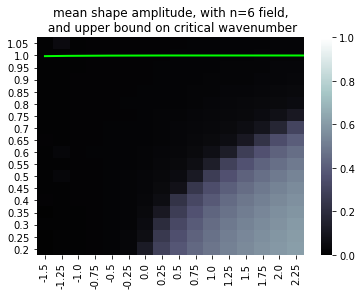

In [522]:

sb.heatmap(abs_amplitude2.T[::-1], cmap='bone', vmin=0, vmax=1)
plt.plot( [(1.5+a)/.25+.5 for a in alphas],[(-k+1.05)/.05+.5 for k in line2], c='lime', linewidth=2)

#plt.plot([(k-.2)/.05 for k in line2], [(1.5+a)/.25 for a in alphas])
plt.xlabel="alpha"
plt.title("mean shape amplitude, with n=6 field,\n and upper bound on critical wavenumber")
plt.show()

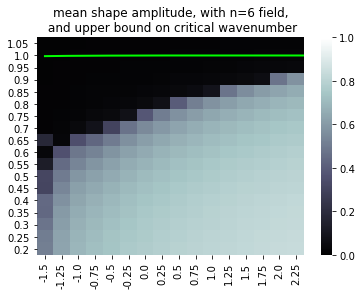

In [526]:

sb.heatmap(abs_amplitude3.T[::-1], cmap='bone', vmin=0, vmax=1)
plt.plot( [(1.5+a)/.25+.5 for a in alphas],[(-k+1.05)/.05+.5 for k in line3], c='lime', linewidth=2)

#plt.plot([(k-.2)/.05 for k in line2], [(1.5+a)/.25 for a in alphas])
plt.xlabel="alpha"
plt.title("mean shape amplitude, with n=6 field,\n and upper bound on critical wavenumber")
plt.show()

At 0K we predict kc=1 at all alpha >=0; stabilization by an ordered field for some alpha<0 (stronger for n=6), and reversal of instability at some alpha < -1.0 (ameliorated more by field bending at n=6).

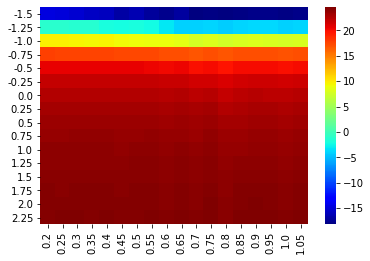

In [544]:
field_energy= sort_csv(path3+"/field_energy.csv")
#each field energy needs to be divided by cylinder length ~1/k
ks=field_energy.columns
for k in ks:
    field_energy.loc[:,k] = field_energy.loc[:,k] *float(k)
sb.heatmap(field_energy, cmap='jet', center=0)
plt.xlabel='k'
plt.ylabel='alpha'

Negative energy definintely indicates ordered field but positive energy could be ordered or disoredered field, because ordered fields have some energy penalty for flucutatoins, for gradients, and for curved surfaces. 

<AxesSubplot:>

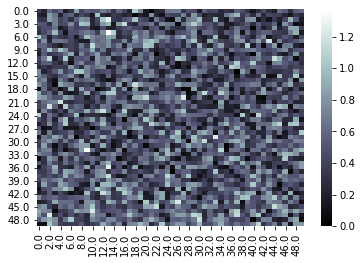

In [460]:
snapshot_0p005_4= sort_csv(path+"/wavenumber_1.0_alpha_-0.25_snapshot.csv", dtype=complex)
sb.heatmap(snapshot_0p005_4, cmap='bone', vmin=0)

<AxesSubplot:>

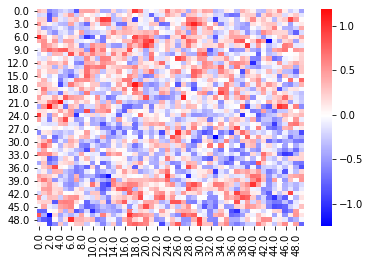

In [461]:
snapshot_0p005_4= sort_csv(path+"/wavenumber_1.0_alpha_-0.25_snapshot.csv", dtype=complex ,fct=(lambda x: x.real))
sb.heatmap(snapshot_0p005_4, cmap='bwr', center=0)

mystery: this slightly negative alpha field (on a flat surface) doesn't look too ordered.
Field's potential landscape has ordered (circle of) minima but is flat; fluctuations are bigger.

<AxesSubplot:>

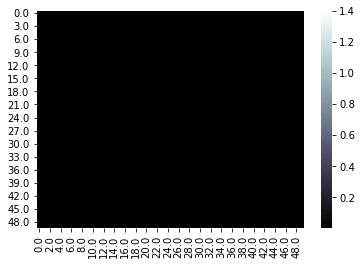

In [462]:
avglattice_0p005_4= sort_csv(path+"/wavenumber_1.0_alpha_-0.25_avglattice.csv", dtype=complex)
sb.heatmap(avglattice_0p005_4,cmap='bone', vmax=1.4)

<AxesSubplot:>

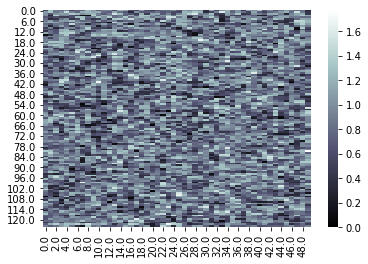

In [233]:
snapshot_0p005_m4= sort_csv(path+"/wavenumber_0.4_alpha_-1.0_snapshot.csv", dtype=complex)
sb.heatmap(snapshot_0p005_m4, cmap='bone', vmin=0)

<AxesSubplot:>

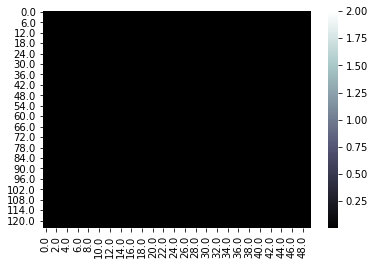

In [463]:
avglattice_0p005_m4= sort_csv(path+"/wavenumber_0.4_alpha_-1.0_avglattice.csv", dtype=complex)
sb.heatmap(avglattice_0p005_m4, cmap='bone', vmax=2)

<AxesSubplot:>

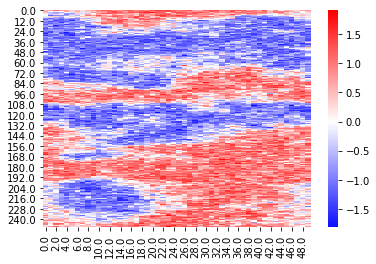

In [464]:
snapshot_0p205_4= sort_csv(path+"/wavenumber_0.2_alpha_-1.5_snapshot.csv", dtype=complex, fct=(lambda x: x.real))
sb.heatmap(snapshot_0p205_4, cmap='bwr', center=0)

<AxesSubplot:>

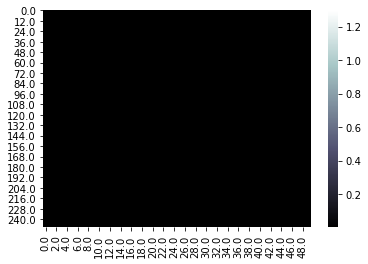

In [465]:
avglattice_0p205_4= sort_csv(path+"/wavenumber_0.2_alpha_-1.5_avglattice.csv", dtype=complex)
sb.heatmap(avglattice_0p205_4, cmap='bone', vmax=1.3)

<AxesSubplot:>

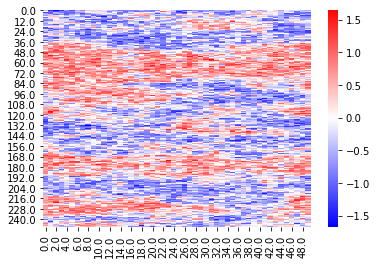

In [237]:
snapshot_0p205_m4= sort_csv(path+"/wavenumber_0.2_alpha_-1.0_snapshot.csv", dtype=complex, fct=(lambda x: x.real))
sb.heatmap(snapshot_0p205_m4, cmap='bwr', center=0)

<AxesSubplot:>

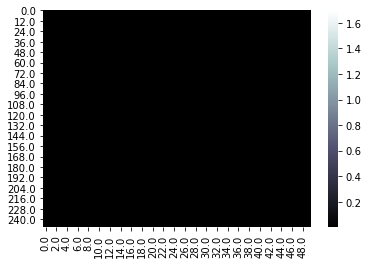

In [466]:
avglattice_0p205_m4= sort_csv(path+"/wavenumber_0.2_alpha_1.0_avglattice.csv", dtype=complex)
sb.heatmap(avglattice_0p205_m4,cmap='bone', vmax=1.7)

(0.0, 2.0)

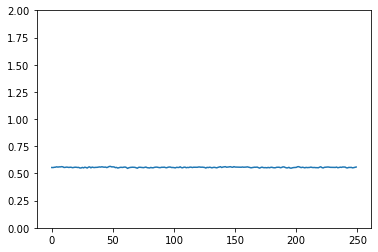

In [541]:
avglattice_0p205_m4_profile= pd.read_csv(path+"/wavenumber_0.2_alpha_-0.5_profile_abs.csv", index_col=0)
plt.plot(avglattice_0p205_m4_profile)
plt.ylim((0,2))

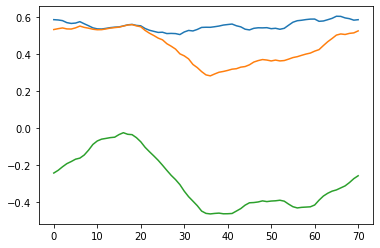

In [467]:
avglattice_0p205_m4_profile= pd.read_csv(path+"/wavenumber_0.7_alpha_-1.0_profile.csv", index_col=0)
plt.plot([abs(complex(x)) for x in avglattice_0p205_m4_profile['0']])
plt.plot([complex(x).real for x in avglattice_0p205_m4_profile['0']])
plt.plot([complex(x).imag for x in avglattice_0p205_m4_profile['0']])

#avglattice_0p205_m4_profile

All the profiles

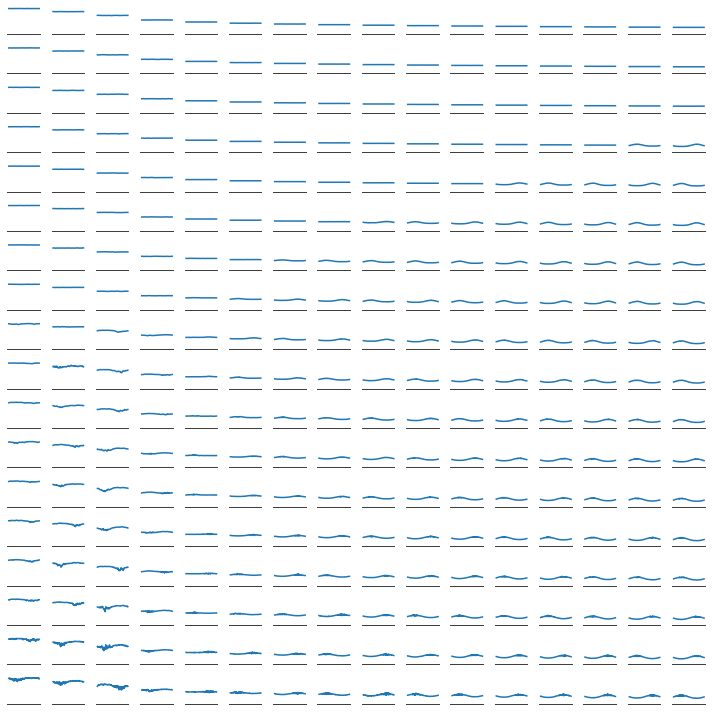

In [539]:
nrows, ncols = abs_amplitude3.transpose().shape
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(10,10))


for ax, params in zip(axs.flat, [(a,k) for k in np.arange(.2, 1.1, .05)[::-1] for a in np.arange(-1.5, 2.5, .25)]):
    a,k= params
    filename="wavenumber_"+str(round(k,2))+"_alpha_"+str(round(a,2))+"_profile_abs.csv"
    #print(filename)
    profile= pd.read_csv(os.path.join(path3, filename), index_col=0)
    ax.set_ylim((0,math.sqrt(1.5)))
    ax.axis('off')
    ax.axhline(y=0, color='black')
    ax.plot(profile)
    #plt.show()

plt.tight_layout()
#pp.savefig()
plt.show()
#pp.close()



In [471]:
avglattice_0p205_m4_mean= pd.read_csv(path+"/wavenumber_0.2_alpha_-1.5_mean.csv", index_col=0)
avglattice_0p205_m4_mean

,abs_amplitude,amplitude_squared,surface_energy,field_energy,param_0,real_group_sampling_width,global_cutoff
0,0.010472,0.000168,62.829314,-84.382684,-0.007467,0.194276,7145


In [533]:
data = pd.read_csv(path3+"/wavenumber_0.2_alpha_1.0.csv")
data1 = pd.read_csv(path3+"/wavenumber_0.4_alpha_-1.0.csv")
data2=pd.read_csv(path3+"/wavenumber_1.0_alpha_2.0.csv")
data3=pd.read_csv(path3+"/wavenumber_0.2_alpha_-1.5.csv")

In [534]:
data.columns

Index(['Unnamed: 0', 'abs_amplitude', 'amplitude_squared', 'surface_energy',
       'field_energy', 'param_0', 'real_group_sampling_width'],
      dtype='object')

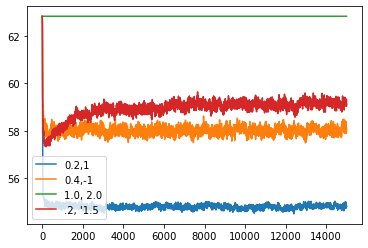

In [535]:
subject="surface_energy"
plt.plot([x*.2 for x in data.loc[:,subject]], label='0.2,1')
plt.plot([x*.4 for x in data1.loc[:,subject]], label='0.4,-1')
plt.plot([x for x in data2.loc[:,subject]], label='1.0, 2.0')
plt.plot([x*.2 for x in data3.loc[:,subject]], label=".2, '1.5")
plt.legend()


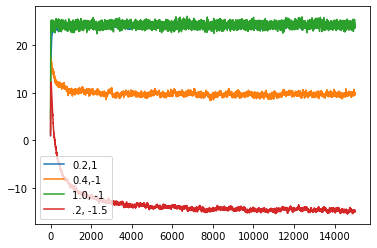

In [536]:
subject="field_energy"
plt.plot([x*.2 for x in data.loc[:,subject]], label='0.2,1')
plt.plot([x*.4 for x in data1.loc[:,subject]], label='0.4,-1')
plt.plot([x for x in data2.loc[:,subject]], label='1.0, -1')
plt.plot([x*.2 for x in data3.loc[:,subject]], label=".2, -1.5")
plt.legend()

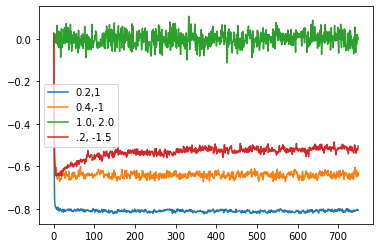

In [537]:
subject="param_0"
plt.plot([x for x in data.loc[:,subject][::20]], label='0.2,1')
plt.plot([x for x in data1.loc[:,subject][::20]], label='0.4,-1')
plt.plot([x for x in data2.loc[:,subject][::20]], label='1.0, 2.0')
plt.plot([x for x in data3.loc[:,subject]][::20], label=".2, -1.5")
plt.legend()

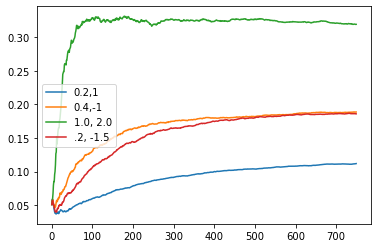

In [546]:
subject="real_group_sampling_width"
plt.plot([x for x in data.loc[:,subject][::20]], label='0.2,1')
plt.plot([x for x in data1.loc[:,subject][::20]], label='0.4,-1')
plt.plot([x for x in data2.loc[:,subject][::20]], label='1.0, 2.0')
plt.plot([x for x in data3.loc[:,subject]][::20], label=".2, -1.5")
plt.legend()